In [1]:
# -*- coding: utf-8 -*-
## HW2-590 ##
# Jie He

#import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Input, Dense, Conv2D, UpSampling2D, Dropout, Flatten, MaxPooling2D
from keras.models import Model, Sequential
from keras.datasets import mnist
from keras.utils import np_utils
from keras import backend as K
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)


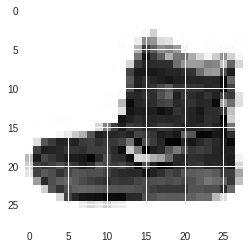

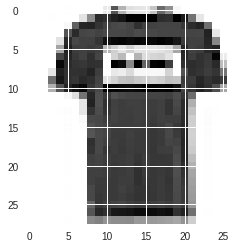

In [2]:
## P1 Autoencoder ##

#load the fashion data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data() #return tuple of np arrays
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255 #normalize data
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
y_train = np_utils.to_categorical(y_train, 10, dtype = 'float32') #there are 10 different classes
y_test = np_utils.to_categorical(y_test, 10, dtype = 'float32') #return a binary matrix representation of the input
print(x_train.shape)
print(x_test.shape)
#display an image for testing
plt.imshow(x_train[0, :, :].reshape(28, 28)) #first image
plt.show()
plt.imshow(x_train[1, :, :].reshape(28, 28)) #second image
plt.show()

In [3]:
input_img = Input(shape = (28, 28, 1)) #instantiate a Keras tensor

#the encoder will consist in a stack of Conv2D and MaxPooling2D layers
x = Conv2D(32, (3, 3), activation='relu', padding='same', strides=(1, 1))(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same', strides=(1, 1))(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same', strides=(1, 1))(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

#the decoder will consist in a stack of Conv2D and UpSampling2D layers
x = Conv2D(16, (3, 3), activation='relu', padding='same', strides=(1, 1))(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same', strides=(1, 1))(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', strides=(1, 1))(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 16)          0         
__________

In [4]:
#model training
autoencoder_fit = autoencoder.fit(x_train, x_train, epochs = 30, batch_size = 128, validation_data = (x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 12s 194us/step - loss: 0.3578 - val_loss: 0.3176
Epoch 2/30
60000/60000 [==============================] - 8s 126us/step - loss: 0.3127 - val_loss: 0.3101
Epoch 3/30
60000/60000 [==============================] - 8s 125us/step - loss: 0.3023 - val_loss: 0.2991
Epoch 4/30
60000/60000 [==============================] - 8s 126us/step - loss: 0.2964 - val_loss: 0.3014
Epoch 5/30
60000/60000 [==============================] - 8s 125us/step - loss: 0.2931 - val_loss: 0.2938
Epoch 6/30
60000/60000 [==============================] - 8s 125us/step - loss: 0.2906 - val_loss: 0.2909
Epoch 7/30
60000/60000 [==============================] - 7s 125us/step - loss: 0.2889 - val_loss: 0.2913
Epoch 8/30
60000/60000 [==============================] - 8s 127us/step - loss: 0.2876 - val_loss: 0.2893
Epoch 9/30
60000/60000 [==============================] - 7s 124us/step - loss: 0.2864 - val_loss: 0.

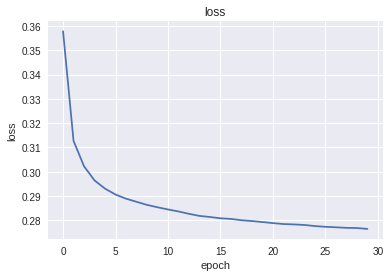

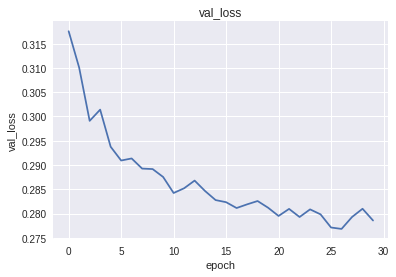

In [5]:
#monitor loss and val_loss
plt.plot(autoencoder_fit.history["loss"])
plt.title("loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

plt.plot(autoencoder_fit.history["val_loss"])
plt.title("val_loss")
plt.ylabel("val_loss")
plt.xlabel("epoch")
plt.show()

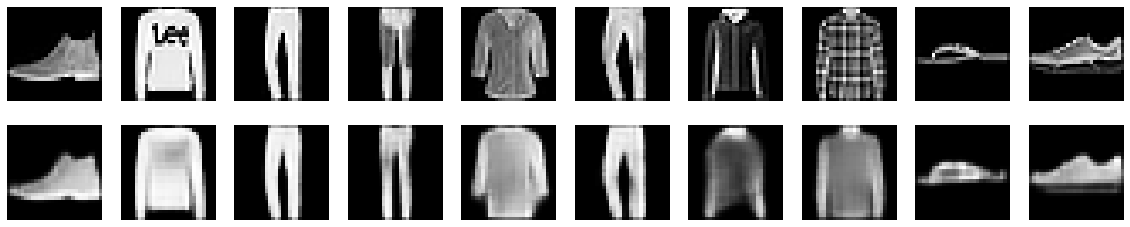

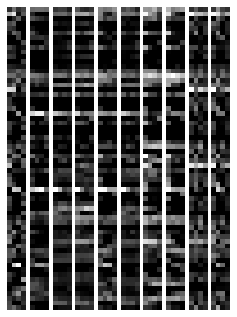

In [6]:
#show the original and reconstructed images:
decoded_imgs = autoencoder.predict(x_test) #model prediction

n = 10
plt.figure(figsize = (20, 4))
for i in range(n):
    #original
    ax = plt.subplot(2, n, i + 1) #num must be 1 <= num <= 20, not 0
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #reconstruction
    ax = plt.subplot(2, n, i + n + 1) #match index
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#256-dimensional encoded representations
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)
n = 10
plt.figure(figsize = (4, 8))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 16).T) #size of 256 (4*4*16)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
## P2 Image Classification ##

# 2.1 Deep CNN #

#data pre-processing
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

y_train = np_utils.to_categorical(y_train, 10, dtype = "float32")
y_test = np_utils.to_categorical(y_test, 10, dtype = "float32")

In [8]:
#3 convolutional layers
input_shape = (28, 28, 1)

cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', strides=(1, 1), input_shape=input_shape)) #pass input size to the first layer
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', strides=(1, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', strides=(1, 1)))
cnn.add(Dropout(0.4))

cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(10, activation='softmax'))

cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 128)         73856     
__________

In [9]:
#model training
cnn_fit = cnn.fit(x_train, y_train, batch_size=256, epochs=30, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 8s 125us/step - loss: 0.6426 - acc: 0.7637 - val_loss: 0.3923 - val_acc: 0.8559
Epoch 2/30
60000/60000 [==============================] - 6s 102us/step - loss: 0.3955 - acc: 0.8568 - val_loss: 0.3383 - val_acc: 0.8767
Epoch 3/30
60000/60000 [==============================] - 6s 101us/step - loss: 0.3435 - acc: 0.8745 - val_loss: 0.2950 - val_acc: 0.8900
Epoch 4/30
60000/60000 [==============================] - 6s 100us/step - loss: 0.3125 - acc: 0.8846 - val_loss: 0.2819 - val_acc: 0.8922
Epoch 5/30
60000/60000 [==============================] - 6s 100us/step - loss: 0.2898 - acc: 0.8951 - val_loss: 0.2617 - val_acc: 0.9027
Epoch 6/30
60000/60000 [==============================] - 6s 101us/step - loss: 0.2729 - acc: 0.8984 - val_loss: 0.2554 - val_acc: 0.9065
Epoch 7/30
60000/60000 [==============================] - 6s 100us/step - loss: 0.2614 - acc: 0.9032 - val_loss: 0.2559 - 

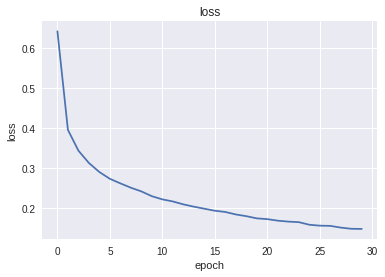

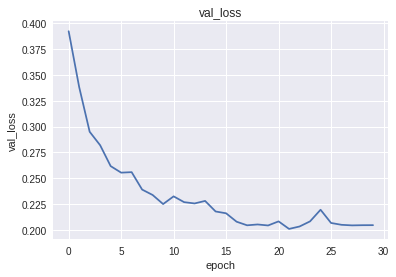



[0.20451165135502816, 0.9315]


In [10]:
#monitor loss and val_loss
plt.plot(cnn_fit.history["loss"])
plt.title("loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

plt.plot(cnn_fit.history["val_loss"])
plt.title("val_loss")
plt.ylabel("val_loss")
plt.xlabel("epoch")
plt.show()

#show the accuracy
cnn_acc = cnn.evaluate(x_test, y_test, verbose = 0)
print("\n")
print(cnn_acc)

The model is a Deep CNN with 3 convolutional layers. The first layer is a Conv2D layer with 32 3x3 filters. Padding is 'same' and strides is 1 by 1. The second layer is a MaxPooling2D layer with pooling size 2x2. The third layer is a Dropout layer with dropout rate 0.25. The forth layer is a Conv2D layer with 64 3x3 filters. Padding is 'same' and strides is 1 by 1. The fifth layer is a MaxPooling2D layer with pooling size 2x2. The sixth layer is a Dropout layer with dropout rate 0.25. The seventh layer is a Conv2D layer with 128 3x3 filters. Padding is 'same' and strides is 1 by 1. The eighth layer is a Dropout layer with dropout rate 0.4. Flatten the 3D outputs to 1D and add 2 Dense layers with relu and softmax activation functions separately. One Dropout layer is in between 2 Dense layers with dropout rate 0.3. Finally, the model accuracy is 93.15% (30 epoches) which is good. 

In [11]:
# 2.2 Transfer Learning #

#pre-trained model used here is VGG19
#import libraries
import keras
import tensorflow as tf
import numpy as np
from keras.applications import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing.image import img_to_array, array_to_img
from keras.layers import Dense, Dropout
from keras.models import Model
from keras import models
from keras import layers
from keras import optimizers

#data preprocessing
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
#convert images into 3 channels and reshape
x_train = np.dstack([x_train] * 3)
x_test = np.dstack([x_test] * 3)
print(x_train.shape) 
print(x_test.shape)
x_train = x_train.reshape(-1, 28, 28, 3)
x_test = x_test.reshape(-1, 28, 28, 3)
print("After Reshaping: ")
print(x_train.shape) 
print(x_test.shape)
#resize images to meet the requirement of VGG19 (minimum input image size: 48x48)
x_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48, 48))) for im in x_train])
x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48, 48))) for im in x_test])
print("After Resizing: ")
print(x_train.shape) 
print(x_test.shape)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') /255
y_train = np_utils.to_categorical(y_train, 10, dtype = 'float32')
y_test = np_utils.to_categorical(y_test, 10, dtype = 'float32')

(60000, 28, 84)
(10000, 28, 84)
After Reshaping: 
(60000, 28, 28, 3)
(10000, 28, 28, 3)
After Resizing: 
(60000, 48, 48, 3)
(10000, 48, 48, 3)


In [12]:
#load pre-trained model
vgg = VGG19(weights="imagenet", include_top=False, input_shape=(48, 48, 3), classes=10)
vgg.summary()

80142336/80134624 [==============================] - 3s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool

In [13]:
#preprocessing the data for VGG19
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)
#features extracting
train_features = vgg.predict(np.array(x_train), batch_size=256, verbose=1)
test_features = vgg.predict(np.array(x_test), batch_size=256, verbose=1)
print(train_features.shape)
print(test_features.shape)

10000/10000 [==============================] - 6s 612us/step
(60000, 1, 1, 512)
(10000, 1, 1, 512)


In [14]:
#flatten features
train_features = np.reshape(train_features, (60000, 1*1*512))
test_features = np.reshape(test_features, (10000, 1*1*512))
print(train_features.shape)
print(test_features.shape)
#final Dense and Dropout layers 
model19 = models.Sequential()
model19.add(layers.Dense(512, activation='relu', input_dim=1*1*512))
model19.add(layers.Dropout(0.3))
model19.add(layers.Dense(10, activation="softmax"))
#model training
model19.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelvgg = model19.fit(train_features, y_train, batch_size=256, epochs=30, verbose=1, validation_data=(test_features, y_test))

(60000, 512)
(10000, 512)
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 30us/step - loss: 2.2734 - acc: 0.2805 - val_loss: 1.6190 - val_acc: 0.4219
Epoch 2/30
60000/60000 [==============================] - 1s 24us/step - loss: 1.5212 - acc: 0.4478 - val_loss: 1.3946 - val_acc: 0.5265
Epoch 3/30
60000/60000 [==============================] - 1s 24us/step - loss: 1.3587 - acc: 0.5160 - val_loss: 1.2880 - val_acc: 0.5566
Epoch 4/30
60000/60000 [==============================] - 1s 24us/step - loss: 1.2708 - acc: 0.5506 - val_loss: 1.2178 - val_acc: 0.5628
Epoch 5/30
60000/60000 [==============================] - 1s 24us/step - loss: 1.1999 - acc: 0.5791 - val_loss: 1.2216 - val_acc: 0.5491
Epoch 6/30
60000/60000 [==============================] - 1s 24us/step - loss: 1.1462 - acc: 0.6009 - val_loss: 1.1072 - val_acc: 0.6120
Epoch 7/30
60000/60000 [==============================] - 1s 24us/step - loss: 1.1041 - acc: 0.6137 - 

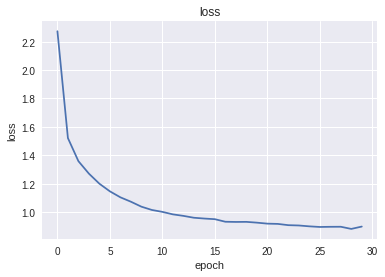

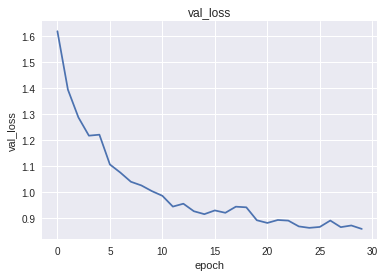



[0.8595902627944946, 0.6982]


In [15]:
#monitor loss and val_loss
plt.plot(modelvgg.history["loss"])
plt.title("loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

plt.plot(modelvgg.history["val_loss"])
plt.title("val_loss")
plt.ylabel("val_loss")
plt.xlabel("epoch")
plt.show()

#show the accuracy
modelvgg_acc = model19.evaluate(test_features, y_test, verbose = 0)
print("\n")
print(modelvgg_acc)

This model uses the pre-trained model, VGG19 and adds two Dense layers and one Dropout layer (0.3 dropout rate) on the top of it. I resized the input images to meet the requirement of using VGG19. Finally, the model accuracy is 69.82% (30 epoches) which is not bad. 

In [16]:
## Text Classification ##

#import library
import requests
import numpy as np
import pandas as pd
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

#download and save datasets
url_1 = 'https://s3.amazonaws.com/anly-590/url-classification/benign-urls.txt'
r_1 = requests.get(url_1, allow_redirects=True)
open('benign-urls.txt', 'wb').write(r_1.content)
url_2 = 'https://s3.amazonaws.com/anly-590/url-classification/malicious-urls.txt'
r_2 = requests.get(url_2, allow_redirects=True)
open('malicious-urls.txt', 'wb').write(r_2.content)

21732

In [17]:
#load datasets
beni = []
with open('benign-urls.txt','r') as f: 
  for line in f: 
    if not line.startswith('#'):  
      beni.append(line.strip()) 
mali = []
with open('malicious-urls.txt','r') as f: 
  for line in f: 
    mali.append(line.strip())
print(beni[0:5])
print(mali[0:5])
#combine strings and create labels
data = beni + mali
str1 = ''.join(str(e) for e in data)
print(str1.find('None'))
label = np.concatenate([np.ones(len(mali)), np.zeros(len(beni))]) #good site: 0; bad site: 1
#store in a dataframe
data_combo = pd.DataFrame({'labels': label, 'sites': data})
cols = data_combo.columns.tolist()
cols = cols[-1:] + cols[:-1]
data_combo = data_combo[cols]
data_combo = shuffle(data_combo) #randomly shuffle the dataframe
print("size of the data:" + " " + str(len(data_combo)))
data_combo.head(5)

['.0.blogger.gmodules.com', '.0.client-channel.google.com', '.0.docs.google.com', '.0.drive.google.com', '.0.gvt0.cn']
['.1337x.pl', '.1link.io', '.1n.pm', '.22apple.com', '.22find.com']
-1
size of the data: 67311


,sites,labels
3595,.r13---sn-25ge7n76.googlevideo.com,0.0
57101,.sb.linkedin.com,0.0
17317,.translate.google.gm,0.0
57800,.auc02mgr.us.oracle.com,0.0
19152,.000dhy1sb2pl1.fareast.corp.microsoft.com,0.0


In [0]:
#train/test split (80:20)
x = np.array(data_combo['sites'])
y = np.array(data_combo['labels'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [19]:
#tokenize/padding
max_len = 100 
char_dim = 30
tok = Tokenizer(char_level=True) #char leve tokenizer
tok.fit_on_texts(x_train)
train_x_tok = tok.texts_to_sequences(x_train)
test_x_tok = tok.texts_to_sequences(x_test)
train_x_tok = pad_sequences(train_x_tok, maxlen=max_len)
test_x_tok = pad_sequences(test_x_tok, maxlen=max_len) #return a sequence matrix
print(len(tok.word_index))
print(train_x_tok.shape)
print(test_x_tok.shape)

41
(53848, 100)
(13463, 100)


In [20]:
# 3.1 RNN #

#import library
from keras.layers import Embedding, LSTM, Activation

#build a RNN below (LSTM)
def rnn():
    inputs = Input(shape=(max_len,), dtype='int32')
    layer = Embedding(len(tok.word_index)+1, char_dim, input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256)(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1)(layer)
    layer = Activation('sigmoid')(layer)
    rnn = Model(inputs=inputs, outputs=layer)
    return rnn 
#compile and train the model
model = rnn()
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #binary classification here
model.fit(train_x_tok, y_train, batch_size=128, epochs=5, validation_split=0.25, callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 100, 30)           1260      
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                24320     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
__________

In [21]:
#performance evaluation
rnn_acc = model.evaluate(test_x_tok, y_test)
print(rnn_acc)

13463/13463 [==============================] - 43s 3ms/step
[0.026944704776304538, 0.9911609596672362]


From the above, we see that the accuracy of the model prediction on test set is 99.11609596672362% which is awesome.

In [25]:
# 3.2 CNN #

#import library
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout, SpatialDropout1D, MaxPool1D

#build a 1D CNN model below
def cnn1(): #two Conv1D layers; more layers might not improve the results
    inputs = Input(shape=(max_len,), dtype='int32')
    layer = Embedding(len(tok.word_index)+1, char_dim, input_length=max_len)(inputs)
    layer = Dropout(0.5)(layer)
    layer = Convolution1D(128, activation='relu', kernel_size=3, padding='valid')(layer)
    layer = SpatialDropout1D(0.1)(layer)
    layer = MaxPool1D()(layer)
    layer = Convolution1D(64, activation='relu', kernel_size=3, padding='valid')(layer)
    layer = SpatialDropout1D(0.1)(layer)
    layer = MaxPool1D()(layer)
    layer = Flatten()(layer)
    layer = Dense(1)(layer)
    layer = Activation('sigmoid')(layer)
    cnn1 = Model(inputs=inputs, outputs=layer)
    return cnn1 
#compile and train the model
model1 = cnn1()
model1.summary()
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #binary classification here
model1.fit(train_x_tok, y_train, batch_size=128, epochs=15, validation_split=0.25, callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 100, 30)           1260      
_________________________________________________________________
dropout_10 (Dropout)         (None, 100, 30)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 98, 128)           11648     
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 98, 128)           0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 49, 128)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 47, 64)            24640     
__________

In [26]:
#performance evaluation
cnn1_acc = model1.evaluate(test_x_tok, y_test)
print(cnn1_acc)

13463/13463 [==============================] - 1s 94us/step
[0.019588859566531436, 0.9937606774121667]


From the above, we see that the accuracy of the model prediction on test set is 99.37606774121667% which is awesome.

[[1.3969948e-06]
 [1.6858499e-05]
 [1.6676601e-02]
 ...
 [9.7175944e-04]
 [1.1689762e-03]
 [4.4921649e-04]]


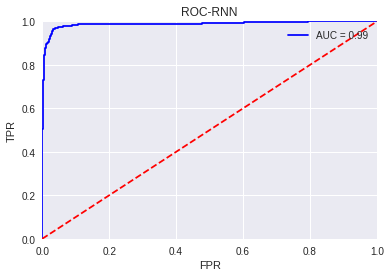

[[4.0309117e-04]
 [4.8668375e-03]
 [7.0505304e-04]
 ...
 [8.2123065e-03]
 [1.9063077e-04]
 [4.3241621e-06]]


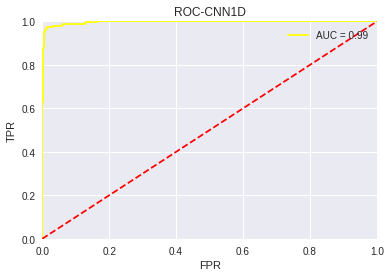

In [27]:
# 3.3 #

#draw ROC curves
from sklearn.metrics import auc, roc_curve
probs = model.predict(test_x_tok)
print(probs)
preds = probs[:, 0]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('ROC-RNN')
plt.plot(fpr, tpr, color = 'blue', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'upper right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

probs_1 = model1.predict(test_x_tok)
print(probs_1)
preds_1 = probs_1[:, 0]
fpr_1, tpr_1, threshold_1 = roc_curve(y_test, preds_1)
roc_auc_1 = auc(fpr_1, tpr_1)

plt.title('ROC-CNN1D')
plt.plot(fpr_1, tpr_1, color = 'yellow', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'upper right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

From the above, we see that the ROC curves are pretty similar.